In [1]:
# !pip install sklearn

import os
import time
import pickle

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
X = pickle.load(open('X.pickle', 'rb'))
Y = pickle.load(open('Y.pickle', 'rb'))

In [3]:
X = X/255.0
Y = to_categorical(Y, num_classes=5)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [4]:
NAME = f'Flowers_Recognition-{int(time.time())}'
DIR_NAME = os.path.abspath('')

tensorboard = TensorBoard(log_dir=f'{DIR_NAME}\logs\\{NAME}')

# Network
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))

model.add(Dense(5, activation='softmax'))

red_lr = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.1)

datagen = ImageDataGenerator(
        featurewise_center=False,              # set input mean to 0 over the dataset
        samplewise_center=False,               # set each sample mean to 0
        featurewise_std_normalization=False,   # divide inputs by std of the dataset
        samplewise_std_normalization=False,    # divide each input by its std
        zca_whitening=False,                   # apply ZCA whitening
        rotation_range=10,                     # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range=0.1,                        # randomly zoom image 
        width_shift_range=0.2,                 # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,                # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,                  # randomly flip images
        vertical_flip=False)                   # randomly flip images

datagen.fit(x_train)

x_test, y_test = x_train, y_train

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001, amsgrad=True), metrics=['accuracy'])

History = model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                              epochs=50, validation_data=(x_test, y_test),
                              verbose=1, steps_per_epoch=x_train.shape[0]//128)


model.save('Adam_AMSGrad_LR0.001.model')

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 25 steps, validate on 3242 samples
Epoch 1/50
25/25 [==============================] - 38s 2s/step - loss: 1.5137 - accuracy: 0.3041 - val_loss: 1.2535 - val_accuracy: 0.4614
Epoch 2/50
25/25 [==============================] - 38s 2s/step - loss: 1.2360 - accuracy: 0.4522 - val_loss: 1.1884 - val_accuracy: 0.4920
Epoch 3/50
25/25 [==============================] - 40s 2s/step - loss: 1.1272 - accuracy: 0.5216 - val_loss: 1.0533 - val_accuracy: 0.5765
Epoch 4/50
25/25 [==============================] - 38s 2s/step - loss: 1.0590 - accuracy: 0.5620 - val_loss: 1.0343 - val_accuracy: 0.5700
Epoch 5/50
25/25 [==============================] - 37s 1s/step - loss: 1.0221 - accuracy: 0.5742 - val_loss: 0.9617 - val_accuracy: 0.6243
Epoch 6/50
25/25 [==============================] - 36s 1s/step - loss: 0.9982 - accuracy: 0.6031 - val_loss: 0.9347 - val_accuracy: 0.6329
Epoch 7/50
25/

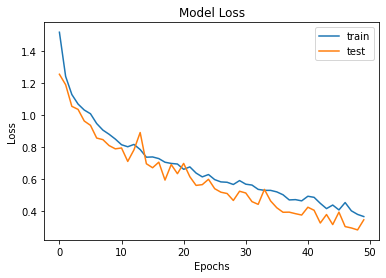

In [5]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

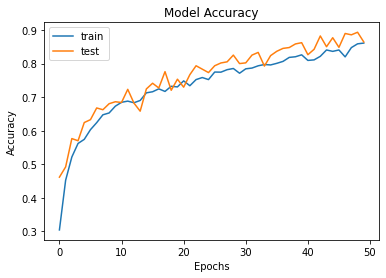

In [7]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()